# 問卷資料分析

In [1]:
#載入所需函示庫
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 80
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import math as math

import statistics as st
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels
import statsmodels.stats.libqsturng

import warnings
warnings.filterwarnings("ignore")

## 1. Kruskal-Wallis Test for Type of Prizes & Wilcoxon Rank Sum Test for Sex
Before performing the nonparametric methods, we've tried the two-way ANOVA test for factor interaction.\
Since the required conditions of the ANOVA test are not satisfied, we then adopt the Kruskal-Wallis test and Wilcoxon Rank Sum Test.
### Hypothesis of Two-Way ANOVA
$H_0$: The type of prizes and the sex do not interact to affect the mean responses.\
$H_1$: The type of prizes and the sex interact to affect the mean responses.\
$\alpha = 0.05$
### Dataset

In [2]:
df = pd.read_excel('Stat_2020_b_1_ANOVA.xlsx', sheet_name = 'form')
print("Head of dataset: ")
display(df.head())
print("Tail of dataset: ")
display(df.tail())

Head of dataset: 


,時間戳記,食品飲料,優惠券\禮品卡\票券,文創品,衣服,書籍,彩妝,電子產品,抱枕、娃娃、療癒小物,性別
0,2021-05-31 19:49:07.299,5,7,9,7,7,5,8,6,生理女
1,2021-05-31 19:55:01.019,8,10,10,7,10,8,4,1,生理男
2,2021-05-31 20:09:48.802,10,7,10,8,8,10,9,9,生理女
3,2021-05-31 20:12:18.670,8,6,6,8,5,1,8,8,生理男
4,2021-05-31 20:16:30.329,7,5,6,4,6,1,10,4,生理男


Tail of dataset: 


,時間戳記,食品飲料,優惠券\禮品卡\票券,文創品,衣服,書籍,彩妝,電子產品,抱枕、娃娃、療癒小物,性別
100,2021-06-06 20:11:21.911,1,1,6,6,8,1,8,6,生理男
101,2021-06-06 21:56:36.606,10,6,10,9,8,1,10,5,生理女
102,2021-06-07 09:42:35.322,6,9,4,1,5,5,7,1,生理女
103,2021-06-07 10:07:39.048,1,10,5,5,8,8,8,1,生理女
104,2021-06-07 10:39:47.691,4,5,5,7,7,6,8,8,生理男


In [3]:
m = df[df['性別'] == '生理男']
print("No. of male responses:", m.shape[0])
f = df[df['性別'] == '生理女']
print("No. of female responses:", f.shape[0])
print("No. of total responses:", df.shape[0])

No. of male responses: 48
No. of female responses: 57
No. of total responses: 105


### Data Preprocessing

In [4]:
b1 = df['食品飲料'][df['性別'] == '生理男'].values.tolist()
b2 = df['食品飲料'][df['性別'] == '生理女'].values.tolist()
b3 = df['優惠券\禮品卡\票券'][df['性別'] == '生理男'].values.tolist()
b4 = df['優惠券\禮品卡\票券'][df['性別'] == '生理女'].values.tolist()
b5 = df['文創品'][df['性別'] == '生理男'].values.tolist()
b6 =  df['文創品'][df['性別'] == '生理女'].values.tolist()
b7 =  df['衣服'][df['性別'] == '生理男'].values.tolist()
b8 = df['衣服'][df['性別'] == '生理女'].values.tolist()
b9 = df['書籍'][df['性別'] == '生理男'].values.tolist()
b10 =  df['書籍'][df['性別'] == '生理女'].values.tolist()
b11 =  df['彩妝'][df['性別'] == '生理男'].values.tolist()
b12 = df['彩妝'][df['性別'] == '生理女'].values.tolist()
b13 =  df['電子產品'][df['性別'] == '生理男'].values.tolist()
b14 = df['電子產品'][df['性別'] == '生理女'].values.tolist()
b15 =  df['抱枕、娃娃、療癒小物'][df['性別'] == '生理男'].values.tolist()
b16 = df['抱枕、娃娃、療癒小物'][df['性別'] == '生理女'].values.tolist()

df1 = pd.DataFrame({'y': b1+b2+b3+b4+b5+b6+b7+b8+b9+b10+b11+b12+b13+b14+b15+b16,
                    'form':['food']*105 + ['tickes']*105 +['culture']*105 +['clothes']*105 + ['books']*105 + ['makeup']*105+ ['3c']*105+ ['dolls']*105,
                    'sex':(['male']*48 + ['female']*57)*8  })
pd.set_option('display.max_rows', 10)
df1['form_sex'] = df1['form'] + "_" + df1['sex']

print("Head of data:")
display(df1.head())
print("Tail of data:")
display(df1.tail())

Head of data:


,y,form,sex,form_sex
0,8,food,male,food_male
1,8,food,male,food_male
2,7,food,male,food_male
3,6,food,male,food_male
4,10,food,male,food_male


Tail of data:


,y,form,sex,form_sex
835,2,dolls,female,dolls_female
836,6,dolls,female,dolls_female
837,5,dolls,female,dolls_female
838,1,dolls,female,dolls_female
839,1,dolls,female,dolls_female


### ANOVA Test for Mean Equality and Factor Interaction

In [5]:
result = smf.ols('y ~ C(form) + C(sex) + C(form):C(sex)', data=df1).fit()
#results.summary()
aov = sms.anova_lm(result, typ=2)
aov

,sum_sq,df,F,PR(>F)
C(form),717.138095,7.0,15.957302,9.672708e-20
C(sex),147.392798,1.0,22.957837,1.963804e-06
C(form):C(sex),226.859301,7.0,5.047929,1.271536e-05
Residual,5290.205044,824.0,NaN,NaN


According to the first row, we can infer that there are differences in the appeal of lottery of different types of prizes.\
According to the second row, we can infer that there are differences in the appeal of lottery between NTU students with different sex.\
According to the third row, since p-value = 1.2715e-05 < 0.05, we reject the null hypothesis.\
There is sufficient evidence to infer that there's interaction between the two factors.

### Checking the Required Conditions
#### (1) Normality Assumption
##### Plotting histogram of the residuals

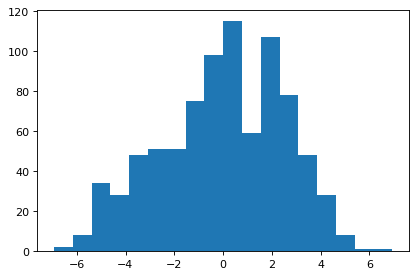

In [6]:
_ = plt.hist(result.resid, bins = 'auto')

##### Plotting Q-Q plot of the residuals

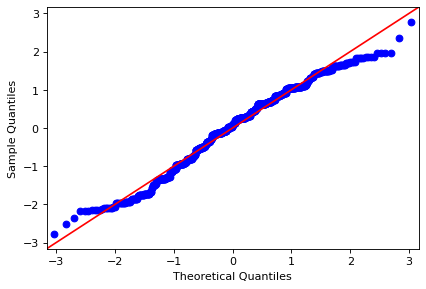

In [7]:
fig = sm.qqplot(result.resid, stats.norm, fit=True, line='45')

##### Shapiro-Wilk normality test

$H_0$: The distribution is normal.  
$H_1$: The distribution is not normal.  
$\alpha$ = 0.05

In [8]:
stat, p = stats.shapiro(result.resid)
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9829, p=0.0000


Since the p-value = 0.0000 < 0.05, we reject the null hypothesis.  
The normality assumption is not satisfied.  
Thus, the result of the ANOVA test might not be that accurate.

#### (2) Equal Variance Assumption
##### Bartlett's Test for Eaual Variances

$H_0$: Variances of different treatment groups are equal.  
$H_1$: At least two treatment groups have different variance.  
$\alpha$ = 0.05

In [40]:
df1['resid'] = result.resid
all_level = df1.form_sex.unique()

data_list = []
for allevel in all_level:
    data_list.append(df1['resid'][df1['form_sex'] == allevel])

stats.bartlett(*data_list)

BartlettResult(statistic=26.041684871135047, pvalue=0.03758680618951096)

Since p-value = 0.0376 < 0.05, we reject the null hypotesis.  
The result suggest that equal variance assumption is violated.  
Thus, the result of the ANOVA test might not be that accurate.

#### (3) Independent Assumption
The observations are independent.

Since the required conditions are not satisfied, we do not apply two-way ANOVA test.
### Kruskal-Wallis Test for Type of Prizes

$H_0$: The locations of all the 8 populations are the same.<br>
$H_1$: Not all 8 population locations are the same.  
$\alpha$ = 0.05

In [9]:
b1 = df['食品飲料'].values.tolist()
b2 = df['優惠券\禮品卡\票券'].values.tolist()
b3 = df['文創品'].values.tolist()
b4 =  df['衣服'].values.tolist()
b5 = df['書籍'].values.tolist()
b6 =  df['彩妝'].values.tolist()
b7 =  df['電子產品'].values.tolist()
b8 =  df['抱枕、娃娃、療癒小物'].values.tolist()


alldata = np.concatenate([b1, b2, b3, b4, b5, b6, b7, b8])
alldata.sort()
tmpdf = pd.DataFrame(({'value': alldata}))
tmpdf['rank'] = tmpdf.index + 1
value2rank = tmpdf.groupby('value').mean().reset_index()
value2rank

,value,rank
0,1,37.5
1,2,95.5
2,3,149.5
3,4,209.5
4,5,273.0
5,6,362.0
6,7,467.5
7,8,590.0
8,9,700.0
9,10,790.5


In [10]:
samp1 = pd.DataFrame({'value': b1})
samp1 = pd.merge(samp1, value2rank)
T1 = samp1['rank'].sum()

samp2 = pd.DataFrame({'value': b2})
samp2 = pd.merge(samp2, value2rank)
T2 = samp2['rank'].sum()

samp3 = pd.DataFrame({'value': b3})
samp3 = pd.merge(samp3, value2rank)
T3 = samp3['rank'].sum()

samp4 = pd.DataFrame({'value': b4})
samp4 = pd.merge(samp4, value2rank)
T4 = samp4['rank'].sum()

samp5 = pd.DataFrame({'value': b5})
samp5 = pd.merge(samp5, value2rank)
T5 = samp5['rank'].sum()

samp6 = pd.DataFrame({'value': b6})
samp6 = pd.merge(samp6, value2rank)
T6 = samp6['rank'].sum()

samp7 = pd.DataFrame({'value': b7})
samp7 = pd.merge(samp7, value2rank)
T7 = samp7['rank'].sum()

samp8 = pd.DataFrame({'value': b8})
samp8 = pd.merge(samp8, value2rank)
T8 = samp8['rank'].sum()



print("T1 = %f" % T1)
print("T2 = %f" % T2)
print("T3 = %f" % T3)
print("T4 = %f" % T4)
print("T5 = %f" % T5)
print("T6 = %f" % T6)
print("T7 = %f" % T7)
print("T8 = %f" % T8)

T1 = 42527.000000
T2 = 46349.000000
T3 = 40506.500000
T4 = 45826.000000
T5 = 42114.000000
T6 = 31527.500000
T7 = 63659.000000
T8 = 40711.000000


In [11]:
n1 = np.array(b1).shape[0]
n2 = np.array(b2).shape[0]
n3 = np.array(b3).shape[0]
n4 = np.array(b4).shape[0]
n5 = np.array(b5).shape[0]
n6 = np.array(b6).shape[0]
n7 = np.array(b7).shape[0]
n8 = np.array(b8).shape[0]

k = 8
n = n1+n2+n3+n4+n5+n6+n7+n8
H = 12/ n / (n+1) * (T1**2/n1 + T2**2/n2 + T3**2/n3 + T4**2/n4 + T5**2/n5 + T6**2/n6 + T7**2/n7 + T8**2/n8 )-3*(n+1)
pvalue = 1 - stats.chi2.cdf(H, k-1)

print("H =", H)
print("p-value =", pvalue)

H = 93.74236250980721
p-value = 0.0


Since p-value < 0.05, we reject the null hypothesis.  
There is sufficient evidence to infer that for different types of prizes, people's willingness are not the same.

### Wilcoxon Rank Sum Test for Sex
$H_0:$ Male's willingness poplulation location are not smaller than female's.<br>
$H_1:$ Male's willingness poplulation location are smaller than female's.  
$\alpha$ = 0.05

In [12]:
b1 = df['食品飲料'][df['性別'] == '生理男'].values.tolist()
b2 = df['食品飲料'][df['性別'] == '生理女'].values.tolist()
b3 = df['優惠券\禮品卡\票券'][df['性別'] == '生理男'].values.tolist()
b4 = df['優惠券\禮品卡\票券'][df['性別'] == '生理女'].values.tolist()
b5 = df['文創品'][df['性別'] == '生理男'].values.tolist()
b6 =  df['文創品'][df['性別'] == '生理女'].values.tolist()
b7 =  df['衣服'][df['性別'] == '生理男'].values.tolist()
b8 = df['衣服'][df['性別'] == '生理女'].values.tolist()
b9 = df['書籍'][df['性別'] == '生理男'].values.tolist()
b10 =  df['書籍'][df['性別'] == '生理女'].values.tolist()
b11 =  df['彩妝'][df['性別'] == '生理男'].values.tolist()
b12 = df['彩妝'][df['性別'] == '生理女'].values.tolist()
b13 =  df['電子產品'][df['性別'] == '生理男'].values.tolist()
b14 = df['電子產品'][df['性別'] == '生理女'].values.tolist()
b15 =  df['抱枕、娃娃、療癒小物'][df['性別'] == '生理男'].values.tolist()
b16 = df['抱枕、娃娃、療癒小物'][df['性別'] == '生理女'].values.tolist()

df1 = pd.DataFrame({'y': b1+b2+b3+b4+b5+b6+b7+b8+b9+b10+b11+b12+b13+b14+b15+b16,
                    'form':['food']*105 + ['tickes']*105 +['culture']*105 +['clothes']*105 + ['books']*105 + ['makeup']*105+ ['3c']*105+ ['dolls']*105,
                    'sex':(['male']*48 + ['female']*57)*8  })
pd.set_option('display.max_rows', 10)
df1

,y,form,sex
0,8,food,male
1,8,food,male
2,7,food,male
3,6,food,male
4,10,food,male
...,...,...,...
835,2,dolls,female
836,6,dolls,female
837,5,dolls,female
838,1,dolls,female


In [13]:
stats.mannwhitneyu(df1['y'][df1['sex']=='male'], df1['y'][df1['sex']=='female'], alternative = 'less')

MannwhitneyuResult(statistic=73652.5, pvalue=3.245149836011175e-05)

Since p-value < 0.05, we reject the null hypothesis.  
There is sufficient evidence that male's willingness are less than female's.

## 2. Kruskal-Wallis Test for Number of Prizes
Before performing the nonparametric method, we've tried the one-way ANOVA test for mean equality.  
Since the required conditions of the ANOVA test are not satisfied, we then adopt the Kruskal-Wallis test.

### Hypothesis of One-Way ANOVA
Let treatment 1 be the lottery with 1 to 3 prizes,  
treatment 2 be the one with 3 to 5 prizes,  
and treatment 3 be the one with more than 5 prizes.  
Let $\mu_i$ be the mean of treatment $i$ and $\sigma_i^2$ be the variance of treatment $i$, $i = 1,2,3$.  

$H_0$: $\mu_1$ = $\mu_2$ = $\mu_3$  
$H_1$: At least two means differ.  
$\alpha$ = 0.05

### Dataset

In [14]:
#讀取資料集
df2 = pd.read_excel('Stat_2020_b_1_ANOVA.xlsx', sheet_name = 'number')

print('Head of dataset:')
display(df2.head())
print("Tail of dataset:")
display(df2.tail())

Head of dataset:


,1 to 3,3 to 5,more than 5
0,5,6,9
1,10,10,10
2,10,10,10
3,9,9,10
4,5,6,6


Tail of dataset:


,1 to 3,3 to 5,more than 5
100,6,6,6
101,5,7,10
102,10,4,1
103,6,9,9
104,5,6,7


### Data Preprocessing

In [15]:
df2.columns = ['number_1to3', 'number_3to5', 'number_5more']
#需要一個ID欄位
df2["id"] = df2.index
#呼叫wide_to_long()
df2_long = pd.wide_to_long(df2, ["number"], sep = "_", suffix = '\w+', i="id", j="factor").reset_index()
print("Head of data:")
display(df2_long.head())
print("Tail of data:")
display(df2_long.tail())

Head of data:


,id,factor,number
0,0,1to3,5
1,1,1to3,10
2,2,1to3,10
3,3,1to3,9
4,4,1to3,5


Tail of data:


,id,factor,number
310,100,5more,6
311,101,5more,10
312,102,5more,1
313,103,5more,9
314,104,5more,7


In [16]:
df2_long = df2_long[['factor', 'number']] 
df2_long.describe()

,number
count,315.000000
mean,7.079365
std,2.347933
min,1.000000
25%,5.500000
50%,7.000000
75%,9.000000
max,10.000000


In [17]:
df2_long.groupby(['factor']).describe()

number                                               
        count      mean       std  min  25%  50%   75%   max
factor                                                      
1to3    105.0  6.038095  2.453113  1.0  4.0  6.0   8.0  10.0
3to5    105.0  7.038095  2.107331  1.0  6.0  7.0   9.0  10.0
5more   105.0  8.161905  1.976418  1.0  7.0  9.0  10.0  10.0

### ANOVA Test for Mean Equality

In [18]:
stats.f_oneway(df2_long['number'][df2_long['factor'] == '1to3'], 
               df2_long['number'][df2_long['factor'] == '3to5'],
               df2_long['number'][df2_long['factor'] == '5more'])

F_onewayResult(statistic=24.755558955528365, pvalue=1.0498759788722242e-10)

In [19]:
results1 = smf.ols('number ~ C(factor)', data=df2_long).fit()
aov_table1 = sms.anova_lm(results1, typ=2)
aov_table1

,sum_sq,df,F,PR(>F)
C(factor),237.073016,2.0,24.755559,1.049876e-10
Residual,1493.942857,312.0,NaN,NaN


Since p-value 1.0499e-10 < 0.05, we reject the null hypothesis.  
We can infer that there are differences in the appeal of lottery between the three intervals of number of prizes.

### Checking the Required Conditions
#### (1) Normality Assumption
##### Plotting histogram of the residuals

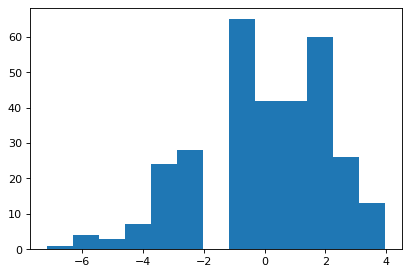

In [20]:
_ = plt.hist(results1.resid, bins = 'auto')

##### Plotting Q-Q plot of the residuals

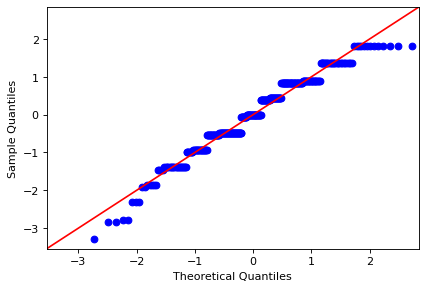

In [21]:
fig = sm.qqplot(results1.resid, stats.norm, fit=True, line='45')

##### Shapiro-Wilk normality test

$H_0$: The distribution is normal.  
$H_1$: The distribution is not normal.  
$\alpha$ = 0.05

In [11]:
stat, p = stats.shapiro(results1.resid)
print('Statistics = %.3f, p = %.3f' % (stat, p))

Statistics = 0.968, p = 0.000


Since the p-value = 0.000 < 0.05, we reject the null hypothesis.  
The normality assumption is not satisfied.  
Thus, the result of the ANOVA test might not be that accurate.

#### (2) Equal Variance Assumption
##### Bartlett's Test for Eaual Variances

$H_0$: $\sigma_1^2$ = $\sigma_2^2$ = $\sigma_3^2$  
$H_1$: At least two variances differ.  
$\alpha$ = 0.05

In [22]:
stats.bartlett(df2_long['number'][df2_long['factor'] == '1to3'], 
               df2_long['number'][df2_long['factor'] == '3to5'],
               df2_long['number'][df2_long['factor'] == '5more'])

BartlettResult(statistic=5.217294814376723, pvalue=0.07363407335468902)

Since p-value = 0.0736 > 0.05, we do not reject the null hypothesis.  
There is sufficient evidence to infer that $\sigma_1^2$ = $\sigma_2^2$ = $\sigma_3^2$.  
The equal variance assumption is not violated.

#### (3) Independent Assumption
The observations are independent.

Since the required conditions are not satisfied, we do not apply one-way ANOVA test.
### Kruskal-Wallis Test for Number of Prizes

H<sub>0</sub> : The locations of three intervals of number of prizes are the same.  <br>
H<sub>1</sub> : At least two intervals locations differ.

$\alpha$ = 0.05

In [23]:
display(df2.head())

,number_1to3,number_3to5,number_5more,id
0,5,6,9,0
1,10,10,10,1
2,10,10,10,2
3,9,9,10,3
4,5,6,6,4


In [24]:
alldata = np.concatenate([df2['number_1to3'], df2['number_3to5'], df2['number_5more']])
alldata.sort()
tmpdf = pd.DataFrame(({'value': alldata}))
tmpdf['rank'] = tmpdf.index + 1
value2rank = tmpdf.groupby('value').mean().reset_index()
value2rank

,value,rank
0,1,3.5
1,2,9.5
2,3,18.0
3,4,35.0
4,5,63.0
5,6,103.0
6,7,151.0
7,8,190.5
8,9,227.0
9,10,282.0


In [25]:
samp1 = pd.DataFrame({'value': df2['number_1to3'].values})
samp1 = pd.merge(samp1, value2rank)
T1 = samp1['rank'].sum()

samp2 = pd.DataFrame({'value': df2['number_3to5'].values})
samp2 = pd.merge(samp2, value2rank)
T2 = samp2['rank'].sum()

samp3 = pd.DataFrame({'value': df2['number_5more'].values})
samp3 = pd.merge(samp3, value2rank)
T3 = samp3['rank'].sum()

print("T1 = %f" % T1)
print("T2 = %f" % T2)
print("T3 = %f" % T3)

T1 = 12463.500000
T2 = 16124.500000
T3 = 21182.000000


In [26]:
n1 = df2['number_1to3'].count()
k = 3
n = n1*k
H = 12/ n / (n+1) * (T1**2/n1 + T2**2/n1 + T3**2/n1)-3*(n+1)
pvalue = 1 - stats.chi2.cdf(H, k-1)

print("H =", H)
print("p-value =", pvalue)

H = 44.009479606188506
p-value = 2.776278096305873e-10


The p-value 2.776278096305873e-10 < 0.05, we reject the null hypothesis  <br>
Therefore, there are sufficient evidence to infer that the appeal of a lottery differ between the three intervals of number of prizes.

## 3. Kruskal-Wallis Test for Price of Prizes
Before performing the nonparametric method, we've tried the one-way ANOVA test for mean equality.  
Since the required conditions of the ANOVA test are not satisfied, we then adopt the Kruskal-Wallis test.

### Hypothesis of One-Way ANOVA
Let treatment 1 be the lottery with prizes worth less than NT\\$100,  
treatment 2 be the one with prizes worth NT\\$100 to NT\\$400,  
treatment 3 be the one with prizes worth NT\\$400 to NT\\$600,  
treatment 4 be the one with prizes worth NT\\$600 to NT\\$800,  
and treatment 5 be the one with prizes worth more than NT\\$800.  
Let $\mu_i$ be the mean of treatment $i$ and $\sigma_i^2$ be the variance of treatment $i$, $i = 1,\dots,5$.  

$H_0$: $\mu_1$ = $\mu_2$ = $\mu_3$ = $\mu_4$ = $\mu_5$  
$H_1$: At least two means differ.  
$\alpha$ = 0.05

### Dataset

In [27]:
#讀取資料集
df3 = pd.read_excel('Stat_2020_b_1_ANOVA.xlsx', sheet_name = 'price')

print('Head of dataset:')
display(df3.head())
print("Tail of dataset:")
display(df3.tail())

Head of dataset:


,less than 100,100 to 400,400 to 600,600 to 800,more than 800
0,5,8,10,10,10
1,10,10,10,10,10
2,10,10,10,10,10
3,4,6,8,9,10
4,8,9,10,10,10


Tail of dataset:


,less than 100,100 to 400,400 to 600,600 to 800,more than 800
100,1,1,1,2,3
101,5,8,8,8,10
102,3,6,8,8,8
103,1,5,6,9,10
104,3,5,6,7,8


### Data Preprocessing

In [28]:
df3.columns = ['price_100less', 'price_100to400', 'price_400to600', 'price_600to800', 'price_800more']
#需要一個ID欄位
df3["id"] = df3.index
#呼叫wide_to_long()
df3_long = pd.wide_to_long(df3, ["price"], sep = "_", suffix = '\w+', i="id", j="factor").reset_index()
print("Head of data:")
display(df3_long.head())
print("Tail of data:")
display(df3_long.tail())

Head of data:


,id,factor,price
0,0,100less,5
1,1,100less,10
2,2,100less,10
3,3,100less,4
4,4,100less,8


Tail of data:


,id,factor,price
520,100,800more,3
521,101,800more,10
522,102,800more,8
523,103,800more,10
524,104,800more,8


In [29]:
df3_long = df3_long[['factor', 'price']] 
df3_long.describe()

,price
count,525.000000
mean,7.034286
std,2.622343
min,1.000000
25%,5.000000
50%,8.000000
75%,9.000000
max,10.000000


In [30]:
df3_long.groupby(['factor']).describe()

price                                                
          count      mean       std  min  25%   50%   75%   max
factor                                                         
100less   105.0  4.447619  2.336915  1.0  3.0   4.0   6.0  10.0
100to400  105.0  6.428571  2.307418  1.0  5.0   7.0   8.0  10.0
400to600  105.0  7.447619  2.125762  1.0  6.0   8.0   9.0  10.0
600to800  105.0  8.019048  2.038009  1.0  7.0   9.0  10.0  10.0
800more   105.0  8.828571  1.913802  1.0  8.0  10.0  10.0  10.0

### ANOVA Test for Mean Equality

In [31]:
stats.f_oneway(df3_long['price'][df3_long['factor'] == '100less'], 
               df3_long['price'][df3_long['factor'] == '100to400'],
               df3_long['price'][df3_long['factor'] == '400to600'],
               df3_long['price'][df3_long['factor'] == '600to800'],
               df3_long['price'][df3_long['factor'] == '800more'])

F_onewayResult(statistic=64.81679697711445, pvalue=1.8383753017141964e-44)

In [32]:
results2 = smf.ols('price ~ C(factor)', data=df3_long).fit()
aov_table2 = sms.anova_lm(results2, typ=2)
aov_table2

,sum_sq,df,F,PR(>F)
C(factor),1198.868571,4.0,64.816797,1.838375e-44
Residual,2404.514286,520.0,NaN,NaN


Since p-value = 1.8384e-44 < 0.05, we reject the null hypothesis.  
We can infer that there are differences in the appeal of lottery between the five intervals of price of prizes.

### Checking the Required Conditions
#### (1) Normality Assumption
##### Plotting histogram of the residuals

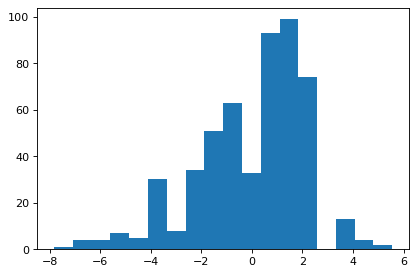

In [33]:
_ = plt.hist(results2.resid, bins = 'auto')

##### Plotting Q-Q plot of the residuals

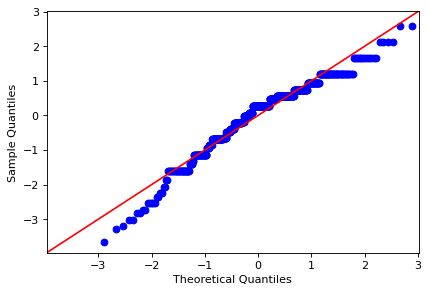

In [34]:
fig = sm.qqplot(results2.resid, stats.norm, fit=True, line='45')

##### Shapiro-Wilk normality test

$H_0$: The distribution is normal.  
$H_1$: The distribution is not normal.  
$\alpha$ = 0.05

In [35]:
stat, p = stats.shapiro(results2.resid)
print('Statistics = %.3f, p = %.3f' % (stat, p))

Statistics = 0.959, p = 0.000


Since the p-value = 0.000 < 0.05, we reject the null hypothesis.  
The normality assumption is not satisfied.  
Thus, the result of the ANOVA test might not be that accurate.

#### (2) Equal Variance Assumption
##### Bartlett's Test for Eaual Variances

$H_0$: $\sigma_1^2$ = $\sigma_2^2$ = $\sigma_3^2$ = $\sigma_4^2$ = $\sigma_5^2$  
$H_1$: At least two variances differ.  
$\alpha$ = 0.05

In [36]:
stats.bartlett(df3_long['price'][df3_long['factor'] == '100less'], 
               df3_long['price'][df3_long['factor'] == '100to400'],
               df3_long['price'][df3_long['factor'] == '400to600'],
               df3_long['price'][df3_long['factor'] == '600to800'],
               df3_long['price'][df3_long['factor'] == '800more'])

BartlettResult(statistic=5.807887369632221, pvalue=0.21396208739408062)

Since p-value = 0.2140 > 0.05, we do not reject the null hypothesis.  
There is sufficient evidence to infer that $\sigma_1^2$ = $\sigma_2^2$ = $\sigma_3^2$ = $\sigma_4^2$ = $\sigma_5^2$.  
The equal variance assumption is not violated.

#### (3) Independent Assumption
The observations are independent.

### Kruskal-Wallis Test for Price of Prizes

H<sub>0</sub> : The locations of five intervals of price of prizes are the same.  <br>
H<sub>1</sub> : At least two intervals locations differ.

$\alpha$ = 0.05

In [37]:
display(df3.head())

,price_100less,price_100to400,price_400to600,price_600to800,price_800more,id
0,5,8,10,10,10,0
1,10,10,10,10,10,1
2,10,10,10,10,10,2
3,4,6,8,9,10,3
4,8,9,10,10,10,4


In [38]:
alldata = np.concatenate([df3['price_100less'], df3['price_100to400'], df3['price_400to600'], df3['price_600to800'], df3['price_800more']])
alldata.sort()
tmpdf = pd.DataFrame(({'value': alldata}))
tmpdf['rank'] = tmpdf.index + 1
value2rank = tmpdf.groupby('value').mean().reset_index()
value2rank

,value,rank
0,1,11.5
1,2,28.0
2,3,52.5
3,4,87.0
4,5,124.0
5,6,166.5
6,7,221.5
7,8,297.0
8,9,371.5
9,10,465.0


In [39]:
samp1 = pd.DataFrame({'value': df3['price_100less'].values})
samp1 = pd.merge(samp1, value2rank)
T1 = samp1['rank'].sum()

samp2 = pd.DataFrame({'value': df3['price_100to400'].values})
samp2 = pd.merge(samp2, value2rank)
T2 = samp2['rank'].sum()

samp3 = pd.DataFrame({'value': df3['price_400to600'].values})
samp3 = pd.merge(samp3, value2rank)
T3 = samp3['rank'].sum()

samp4 = pd.DataFrame({'value': df3['price_600to800'].values})
samp4 = pd.merge(samp4, value2rank)
T4 = samp4['rank'].sum()

samp5 = pd.DataFrame({'value': df3['price_800more'].values})
samp5 = pd.merge(samp5, value2rank)
T5 = samp5['rank'].sum()

print("T1 = %f" % T1)
print("T2 = %f" % T2)
print("T3 = %f" % T3)
print("T4 = %f" % T4)
print("T5 = %f" % T5)

T1 = 12863.000000
T2 = 22866.000000
T3 = 29285.500000
T4 = 33291.000000
T5 = 39769.500000


In [40]:
n1 = df3['price_100less'].count()
k = 5
n = n1*k
H = 12/ n / (n+1) * (T1**2/n1 + T2**2/n1 + T3**2/n1 + T4**2/n1 + T5**2/n1)-3*(n+1)
pvalue = 1 - stats.chi2.cdf(H, k-1)

print("H =", H)
print("p-value =", pvalue)

H = 175.02451421328988
p-value = 0.0


The p-value 0.0 < 0.05, we reject the null hypothesis  <br>
Therefore, there are sufficient evidence to infer that the appeal of a lottery differ between the five intervals of price of prizes.